In [2]:
#測試訊息傳送是否成功
import lineTool
import tokenword

token = tokenword.token
msg = "整合測試訊息測試，恭喜您"
response=lineTool.lineNotify(token,msg) #呼叫lineTool的方法
if response == 200: #網頁正常=200
    print('傳送成功')
else:
    print('傳送失敗')

傳送成功


In [17]:
#整合LINE Notify和matplotlib發送圖片至Line群組
#使用matplotlib套件，把txt檔的數據畫出圖表
#請您輸入班上數學成績單，畫出圖片和建立圖片

#str.split(sep=None, maxsplit=- 1)
#spe=分割符號，預設為空格
#maxsplit=分割次數，預設為-1次=沒有限制


with open('math.txt') as file:  #使用with確保檔案使用完畢後會被自動關閉
    content = file.read()
    
contentList = content.split('\n') #分割字串，一行分割成一個字串
#print(f"contentList={contentList}")

names, scores = [], [] 
for item in contentList: #把math.txt的內容for in環圈列出＆分割字串
    itemList = item.split(',') #一個逗號分割成一個字串
    #print(f"itemList={itemList}")
    names.append(itemList[0]) #建立name字串，並將itemList[0]的內容寫入
    scores.append(int(itemList[1])) #分數記得要轉成整數


#使用matplotlib.plot方法話單條線
#matplotlib.plot([x], y, [fmt], *, data=None, **kwargs) 
#[fmt]=樣式（可以改顏色＆圖表畫面，'g'是綠色，預設是藍色


print(f"names={names}")
print(f"sores={scores}")
import matplotlib.pyplot as plt 
plt.plot(names, scores, 'g') 
plt.savefig('math.jpg') #將當前圖表儲存（'檔名'）

names=['Rachel', 'Sandy', 'Judy', 'Eric', 'Wendy']
sores=[97, 64, 82, 99, 12]


UsageError: Line magic function `%` not found.


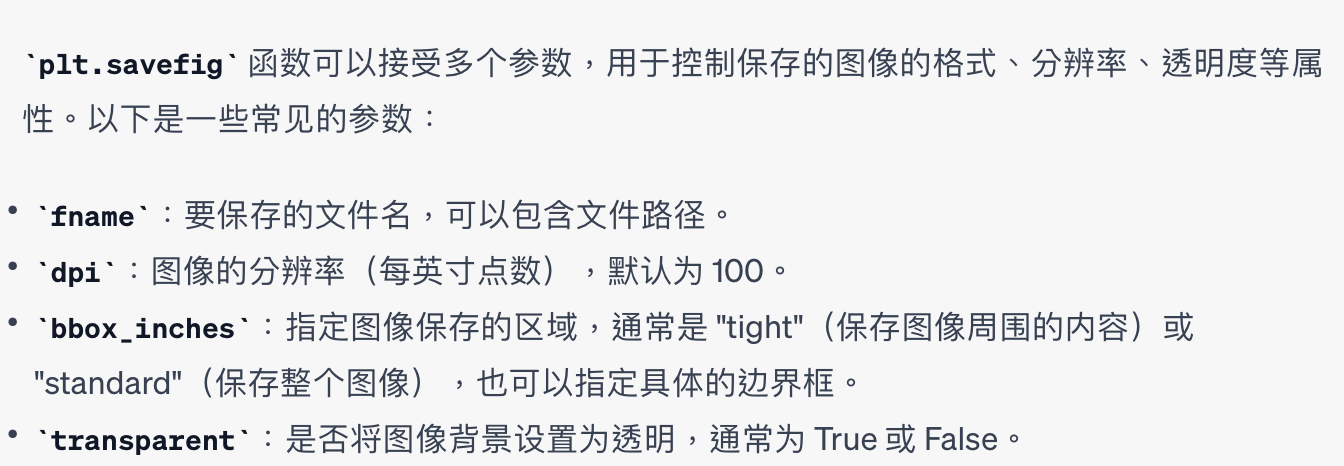

In [18]:
#(四）建立自訂的function可以同時傳送message和圖片給line Notify
#發送message和圖片給line
#發送時需要在Headers設定權杖，並且把訊息放在payload的messange裡面
#使用requests.post功能
#requests.post(url, data={key: value}, json={key: value}, args) 一定要有url
#url=要傳送請求的http網址
#data=傳送參數（dict），通常只會在post裡使用 / params是get常用的

import requests
import tokenword

def sendLineNotify(token, msg, picURI): #自定義要傳送訊息的def，後面括號內的參數我都可以自己取名
    url = "https://notify-api.line.me/api/notify"  #要呼叫的LINE API網址
    headers = {"Authorization":"Bearer " + token}  #LINE要求的寫法＋權杖（Bearer後面一定要空一格）
    payload = {"message": msg} #dict參數用{}
    files = {"imageFile":open(picURI, 'rb')} #files=傳輸文件（dict） #picURI = 圖片路徑 #rb=二進制儲存(什麼意思？)
    r = requests.post(url, headers=headers, data = payload, files = files) #下載後將結果傳到r這個變數中
    return r.status_code #傳回伺服器狀態碼，200=網頁正常

token = tokenword.token #叫出權杖
message = "5年9班數學成績"
picURI = "math.jpg" 
response = sendLineNotify(token, message, picURI) #呼叫方法＆寫入參數

if response == 200:
    print('發送成功')
else:
    print('發送失敗')

發送成功


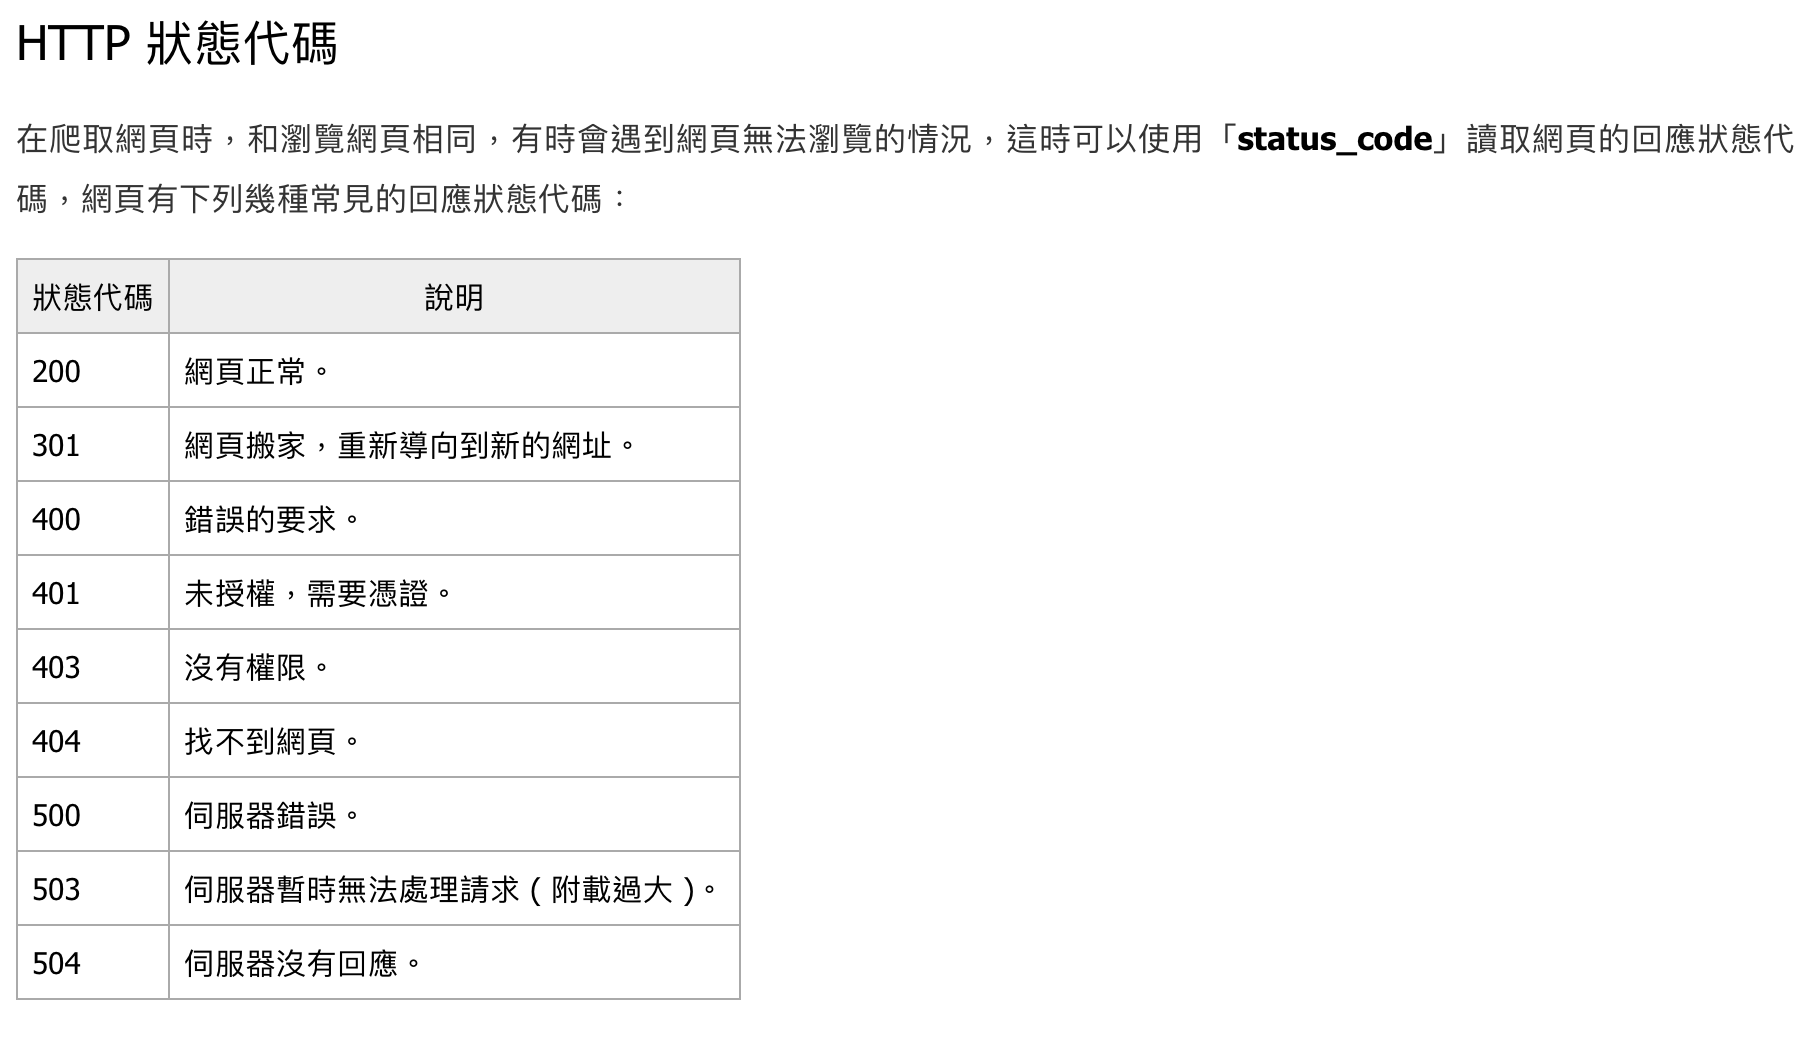
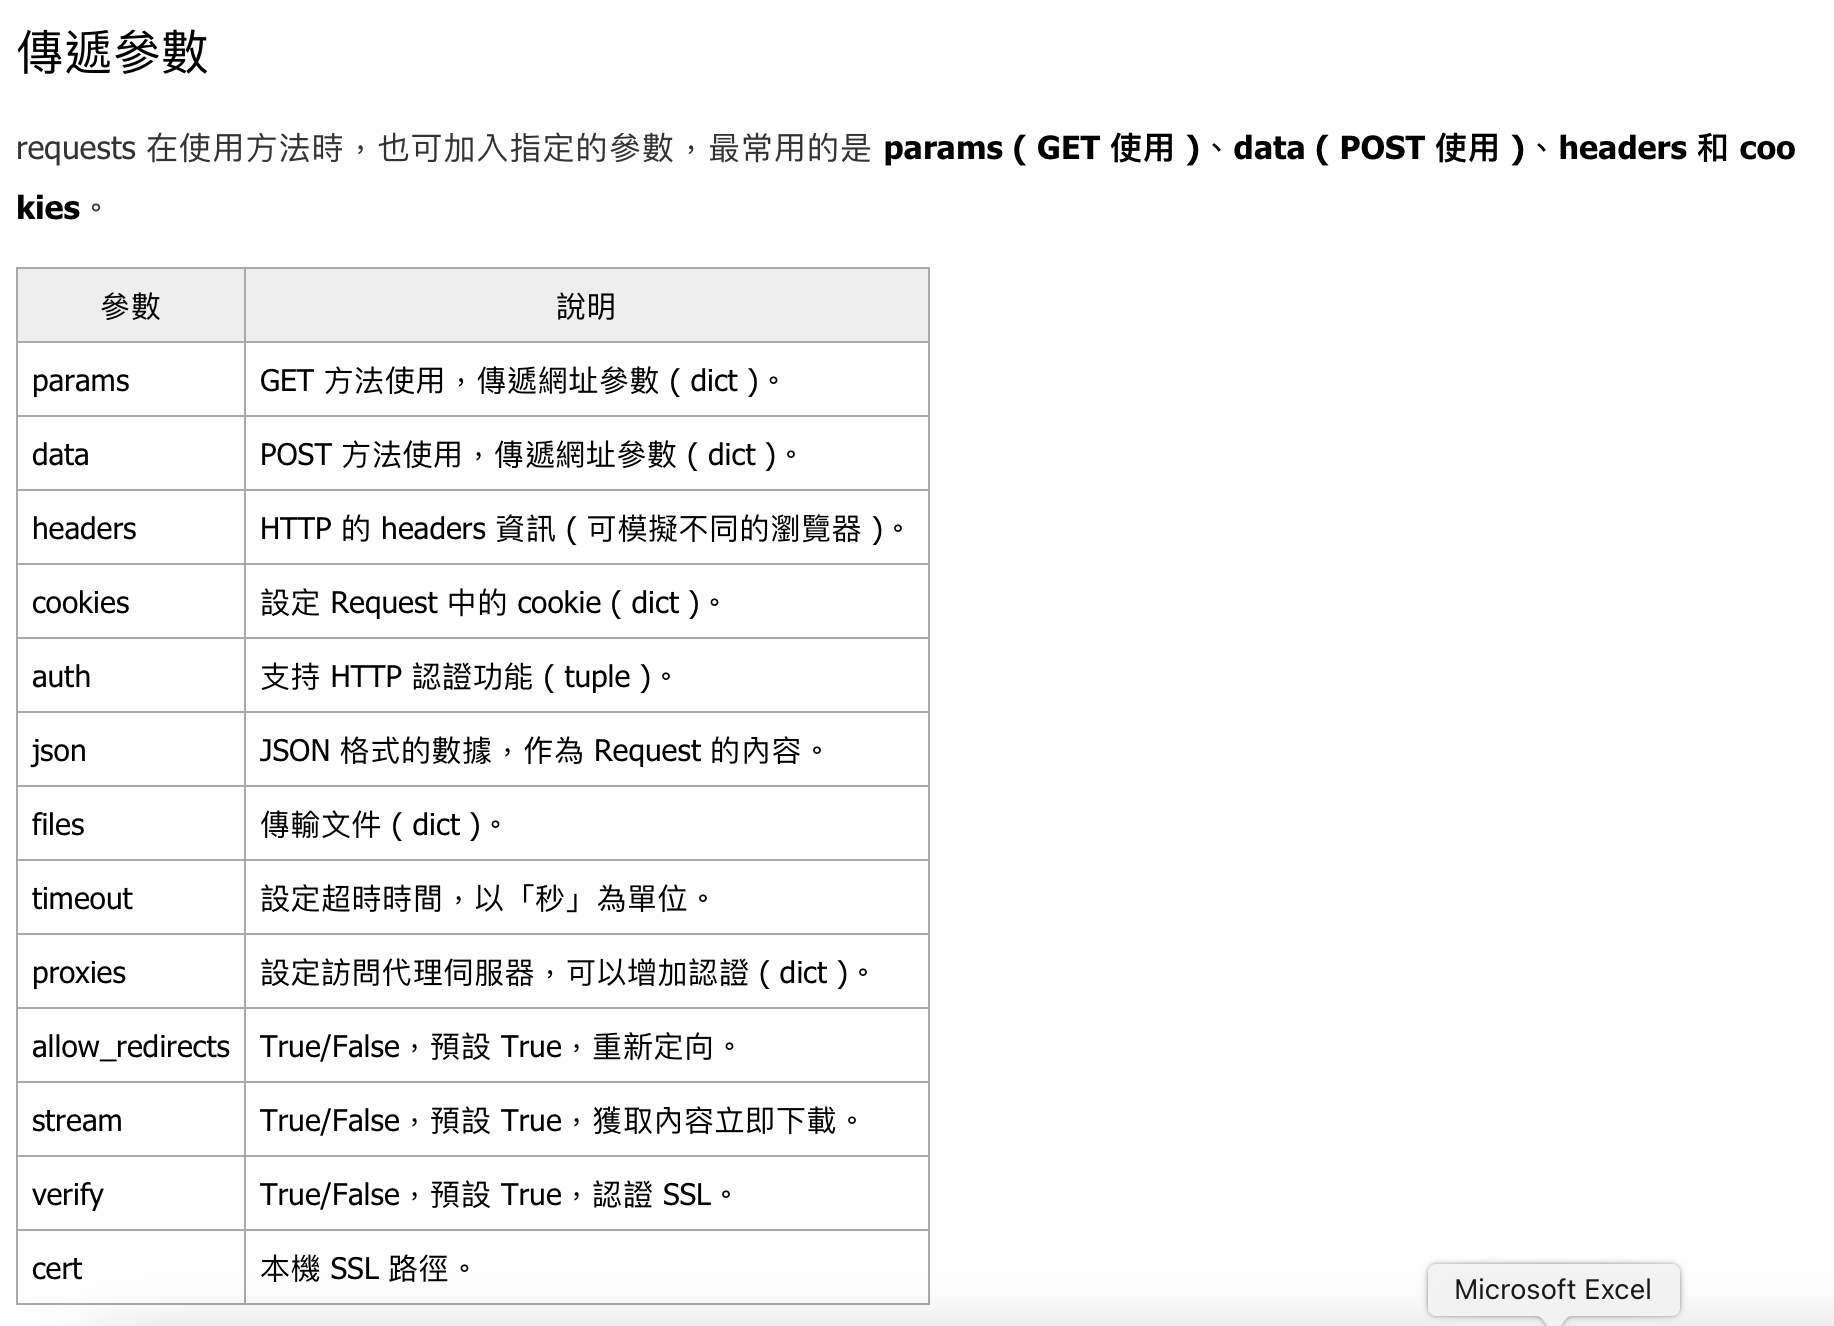